In [1]:
# Data Wrangling libraries
import pandas as pd 
import numpy as np 
from scipy import stats 


# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.ticker as ticker

# Machine Learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Graph style
#sns.set_style("whitegrid")


from itertools import chain

In [2]:
base = pd.read_csv("Movies_new.csv")

Describe function show that the Budget and Revenue columns has 0 as a min values, however, the info() function showed that there isnt any NaN value

In [3]:
base.count()
base.isnull().sum()

ID              0
Movie           0
Year            0
Rating          0
Watched         0
Cinema          0
Vote Average    0
Vote Count      0
Runtime         0
Genres          0
Budget          0
Revenue         0
dtype: int64

This function replace all 0 value to NaN and then it is possible to fill this values with the median of the specific column

In [4]:
replace = base.replace(0, np.nan, inplace=True)

In [5]:
budget_median = base.Budget.median()
revenue_median = base.Revenue.median()

In [6]:
base["Budget"].fillna(budget_median, inplace = True)
base["Revenue"].fillna(revenue_median, inplace = True)

In [7]:
base["Profit"] = base["Revenue"] - base["Budget"]
base.to_csv("Movies_profit.csv", index=False)

# Outliers

In [8]:
min_budget_thresold, max_budget_thresold = base.Budget.quantile([0.005, 0.995]) 
min_profit_thresold, max_profit_thresold = base.Budget.quantile([0.005, 0.995]) 

In [9]:
min_profit_thresold, max_profit_thresold = base.Budget.quantile([0.005, 0.995]) 
min_profit_thresold, max_profit_thresold

(847620.0, 300000000.0)

In [10]:
base[base["Budget"]< min_budget_thresold]
base[base["Budget"]> max_budget_thresold]

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Profit
241,299534,Avengers: Endgame,2019,4,2019-04-21,False,4.15,14197,181,Adventure|SciFi|Action,356000000.0,2.797801e+09,2.441801e+09


In [11]:
base[base["Profit"]< min_profit_thresold]
base[base["Profit"]> max_profit_thresold]

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Profit
0,281957,The Revenant,2015,4,2016-01-01,False,3.75,13329,157,Western|Drama|Adventure,135000000.0,5.329505e+08,3.979505e+08
19,293660,Deadpool,2016,5,2016-02-11,True,3.80,23212,108,Action|Adventure|Comedy,58000000.0,7.831000e+08,7.251000e+08
26,85,Raiders of Lost Ark,1981,5,2016-02-27,False,3.95,8137,115,Adventure|Action,18000000.0,3.899260e+08,3.719260e+08
30,87,Indiana Jones and the Temple of Doom,1984,4,2016-03-04,False,3.65,5984,118,Adventure|Action,28000000.0,3.330000e+08,3.050000e+08
35,209112,Batman v Superman: Dawn of Justice,2016,3,2016-03-24,True,2.90,13621,151,Action|Adventure|Fantasy,250000000.0,8.736349e+08,6.236349e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,474350,It Chapter Two,2019,3,2019-09-07,True,3.40,4421,169,Horror|Fantasy,79000000.0,4.730932e+08,3.940932e+08
247,475557,Joker,2019,5,2019-10-01,True,4.10,13807,122,Crime|Thriller|Drama,55000000.0,1.074251e+09,1.019251e+09
252,181812,Star Wars: The Rise of Skywalker,2019,3,2019-12-26,True,3.30,5253,142,Action|Adventure|SciFi,250000000.0,1.074144e+09,8.241442e+08
271,105,Back To The Future,1985,4,2020-04-19,False,4.15,13483,116,Adventure|Comedy|SciFi|Family,19000000.0,3.811098e+08,3.621098e+08


In [12]:
base_outliers = base[(base.Budget < max_budget_thresold) & (base.Budget > min_budget_thresold) & (base.Profit < max_profit_thresold) &  (base.Profit > min_profit_thresold) ]

In [13]:
base_outliers

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Profit
1,273248,The Hateful 8,2015,5,2016-01-02,True,3.85,10023,188,Crime|Drama|Mystery|Western,44000000.0,155760117.0,111760117.0
2,9741,Unbreakable,2000,3,2016-01-03,False,3.55,6342,106,Thriller|Drama|Mystery,75000000.0,248118121.0,173118121.0
3,141,Donnie Darko,2001,4,2016-01-03,False,3.90,8359,114,Fantasy|Drama|Mystery,6000000.0,6979093.0,979093.0
4,24,Kill Bill vol. 1,2003,4,2016-01-03,False,4.00,11979,111,Action|Crime,30000000.0,180899045.0,150899045.0
5,312221,Creed,2015,4,2016-01-03,False,3.70,4890,133,Drama,37000000.0,173567581.0,136567581.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,595,To Kill a Mockingbird,1962,3,2020-04-12,False,4.00,1625,130,Crime|Drama,2000000.0,13129846.0,11129846.0
272,446159,Bacurau,2019,4,2020-04-25,False,4.05,503,132,Mystery|Western|Thriller,30000000.0,151866047.5,121866047.5
273,331482,Little Women,2019,4,2020-05-01,False,4.00,2559,135,Drama|Romance,40000000.0,191540586.0,151540586.0
275,324857,Spider-Man: Into the Spider-Verse,2018,5,2020-05-09,False,4.20,7611,117,Action|Adventure|Animation|SciFi|Comedy,90000000.0,375540831.0,285540831.0


# Graph Analysis

# Boxplot comparing user rating and movies database average ratings

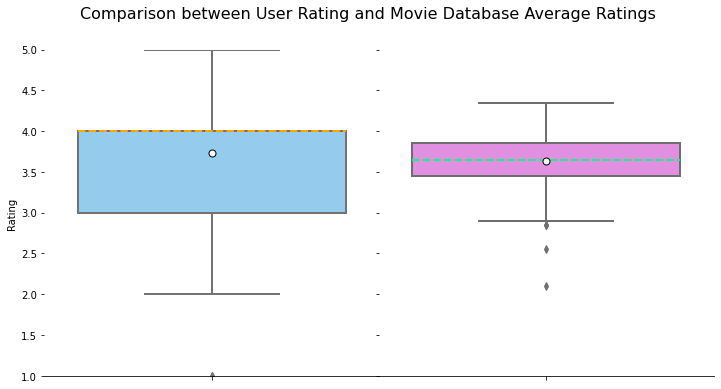

In [14]:
fig, axs = plt.subplots(ncols=2, figsize = (12,6), sharey=True)
fig.suptitle("Comparison between User Rating and Movie Database Average Ratings", fontsize=16)
plt.subplots_adjust(wspace=0, hspace=0)
plt.ylim(1,5)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.despine(left= True)



user_boxplot = sns.boxplot(y = base["Rating"], 
                            color="lightskyblue", 
                            showmeans=True, 
                            meanprops= {"marker":"o",
                                        "markerfacecolor":"white", 
                                        "markeredgecolor":"black", 
                                        "markersize":"7"},
                            medianprops = {"color":"orange", 
                                           "linestyle":"--"}, 
                            ax=axs[0])


database_boxplot = sns.boxplot(y = base["Vote Average"], 
                           color="violet", 
                           showmeans=True,
                           meanprops= {"marker":"o",
                                       "markerfacecolor":"white", 
                                       "markeredgecolor":"black", 
                                       "markersize":"7"},
                           medianprops = {"color":"springgreen", 
                                          "linestyle":"--"},
                           ax=axs[1]).set(ylabel=None)

plt.savefig("Graphs/Boxplot_Ratings")

# Transform the genres in a Series of genres and  Genres x Rating x Vote Average

In [15]:
df_genres_id= pd.Series(base["Genres"].values, index = base["ID"], name = "Genres")
split_genres = df_genres_id.str.split("|", expand = False)
genres_explode = split_genres.explode()

genres_explode

ID
281957      Western
281957        Drama
281957    Adventure
273248        Crime
273248        Drama
            ...    
324857        SciFi
324857       Comedy
530385       Horror
530385        Drama
530385      Mystery
Name: Genres, Length: 769, dtype: object

In [16]:
df_genres = genres_explode.to_frame()
df_genres.reset_index(level=0, inplace=True)
genres_count = genres_explode.value_counts()

genres_unique = df_genres["Genres"].unique()


In [17]:
merge_data = df_genres.merge(base[['ID','Rating', 'Vote Average']], 
           on = "ID",
           how='left')   
by_genres = merge_data.groupby("Genres")   

In [18]:
merge_data

,ID,Genres,Rating,Vote Average
0,281957,Western,4,3.75
1,281957,Drama,4,3.75
2,281957,Adventure,4,3.75
3,273248,Crime,5,3.85
4,273248,Drama,5,3.85
...,...,...,...,...
782,324857,SciFi,5,4.20
783,324857,Comedy,5,4.20
784,530385,Horror,4,3.55
785,530385,Drama,4,3.55


<Figure size 720x432 with 0 Axes>

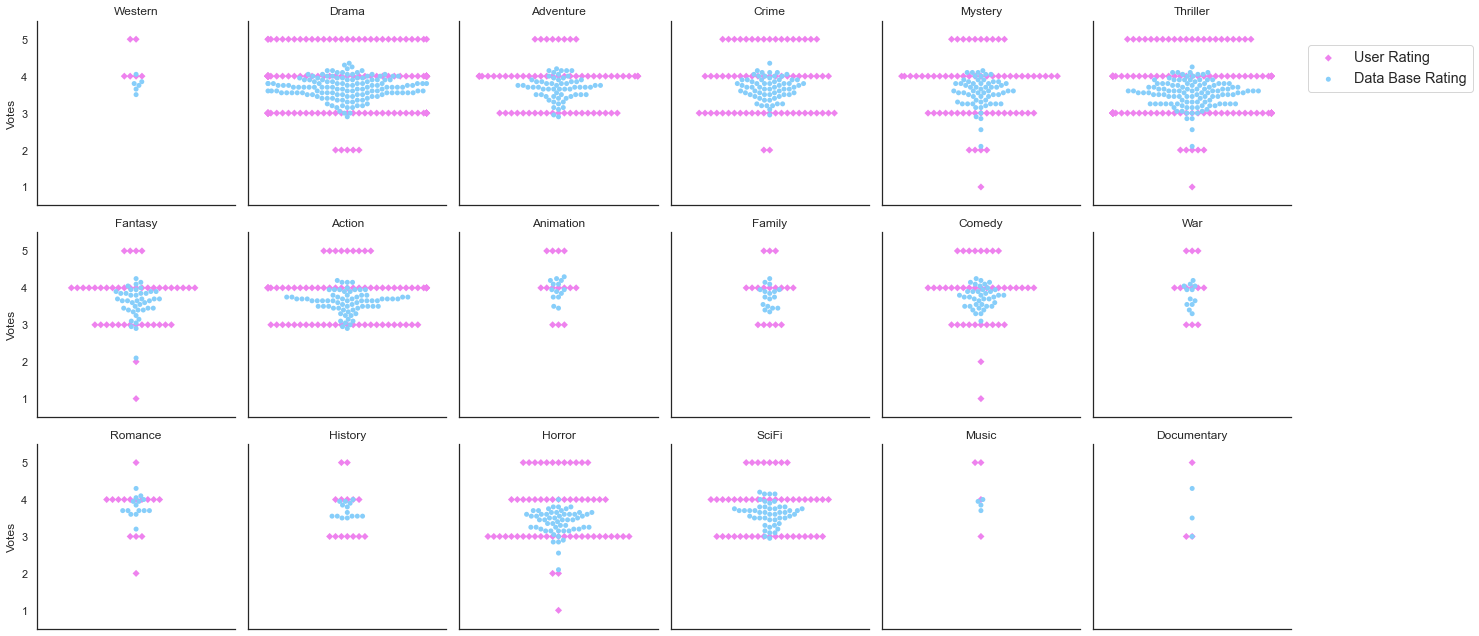

In [48]:
sns.set(style='white')
sns.despine(right=True, left=True)



g = sns.FacetGrid(merge_data, col = "Genres", col_wrap= 6)
g = g.map_dataframe(sns.swarmplot, y = "Rating", color = "violet", marker="D")
g = g.map_dataframe(sns.swarmplot, y = "Vote Average", color = "lightskyblue")

g.set(ylim=(0.5, 5.5))
g.set_titles("{col_name}")
g.set_axis_labels(None, "Votes")

#g.add_legend(bbox_to_anchor=(1.5, 1.5), loc=2, borderaxespad=0.)
plt.legend(loc='upper center', labels=['User Rating', 'Data Base Rating'], bbox_to_anchor=(1.5, 3.2), fontsize = "large")

<Figure size 720x432 with 0 Axes>

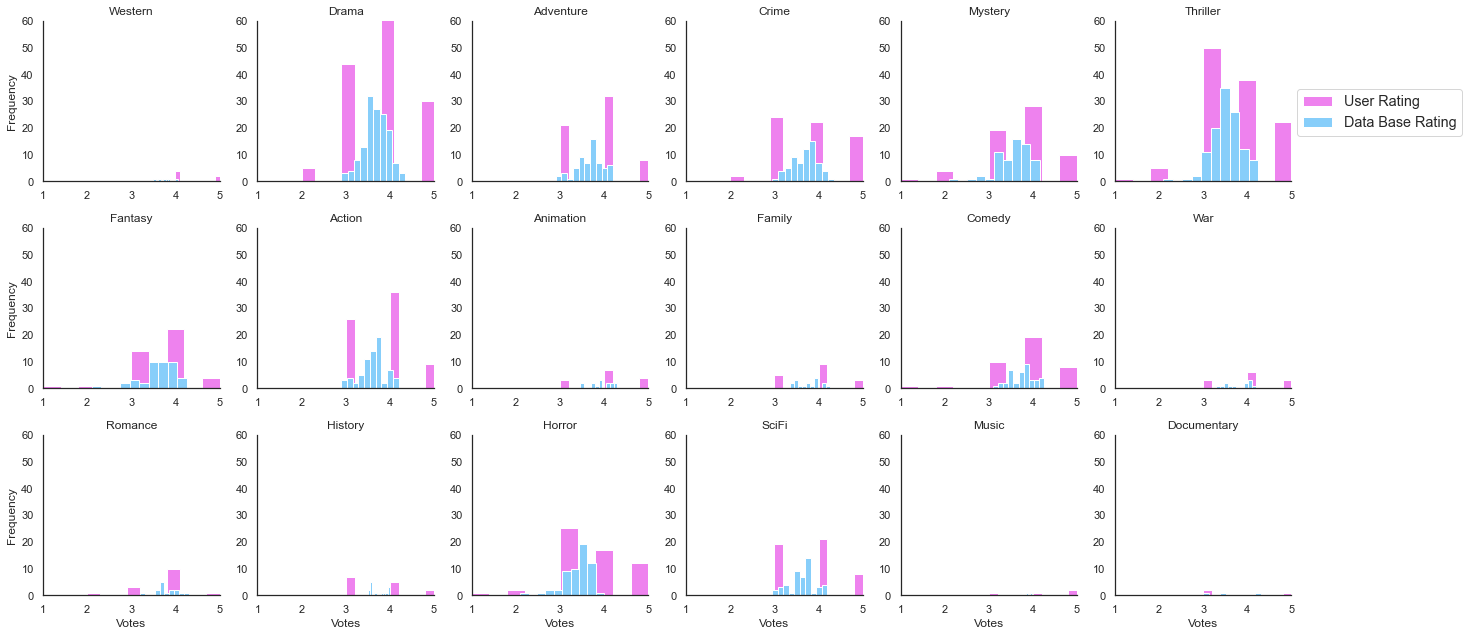

In [81]:
sns.set(style='white')
sns.despine(right=True, left=True)


g = sns.FacetGrid(merge_data, col = "Genres", col_wrap= 6, sharex= False, sharey= False)
g = g.map(plt.hist, "Rating", color = "violet")
g = g.map(plt.hist, "Vote Average", color = "lightskyblue")

g.set(xlim=(1, 5))
g.set(ylim=(0, 60))
g.set_titles("{col_name}")
g.set_axis_labels("Votes", "Frequency")

#g.add_legend(bbox_to_anchor=(1.5, 1.5), loc=2, borderaxespad=0.)
plt.legend(loc='upper center', labels=['User Rating', 'Data Base Rating'], bbox_to_anchor=(1.5, 3.2), fontsize = "large")

In [20]:
genres_unique

array(['Western', 'Drama', 'Adventure', 'Crime', 'Mystery', 'Thriller',
       'Fantasy', 'Action', 'Animation', 'Family', 'Comedy', 'War',
       'Romance', 'History', 'Horror', 'SciFi', 'Music', 'Documentary'],
      dtype=object)

# Year x Rating

* Deixar esse gráfico legal
* Arrumar o hue
* Tentar colocar uma colorbar somente nos valores de vote average relacionando com vote count

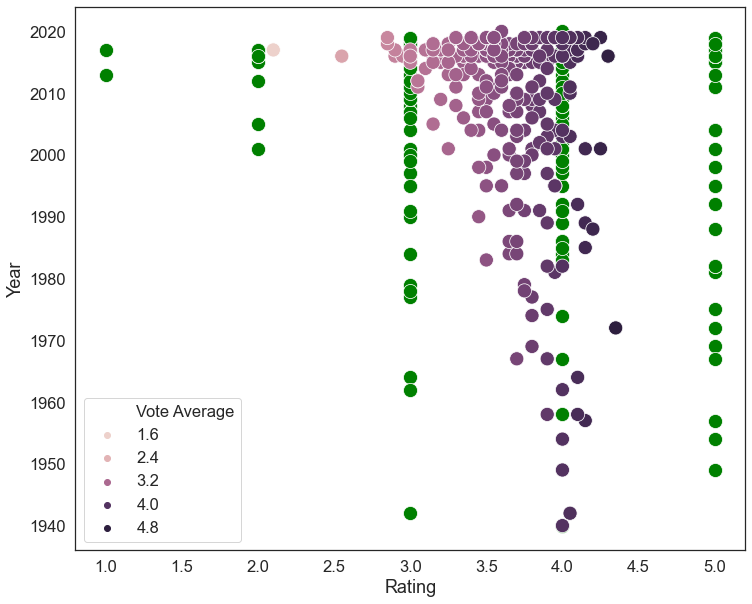

In [21]:
sns.set(rc={"figure.figsize": (12,10)},font_scale=1.5)
sns.set_style("white")


user_ratings= sns.scatterplot(x = base["Rating"], 
                y = base["Year"],
                s = 200,
                color = "green"
                )

database_rating = sns.scatterplot(x = base["Vote Average"], 
                y = base["Year"],
                s = 200,
                hue = base["Vote Average"]
                )

#cbar = plt.colorbar(database_rating) 

user_ratings.set(xlabel='Rating', ylabel='Year')

plt.savefig("Graphs/Year_Rating")

# WordCloud dos generos

In [22]:
all_genres = " ".join(s for s in genres_explode).strip()

all_genres

'Western Drama Adventure Crime Drama Mystery Western Thriller Drama Mystery Fantasy Drama Mystery Action Crime Drama Crime Thriller Action Crime Thriller Animation Family Fantasy Drama Comedy War Drama Romance Drama Thriller Comedy Drama Crime Thriller Drama Mystery Crime Drama Crime Action Thriller Drama Thriller History Crime Drama Thriller Action Adventure Comedy Drama Thriller Western Drama Crime Crime Drama Mystery Crime Drama Thriller Thriller Mystery Drama Crime Mystery Thriller Adventure Action Action Drama History War Crime Drama Mystery Crime Thriller Adventure Action Horror Mystery Thriller Mystery Horror Drama Drama Thriller Comedy Action Adventure Fantasy Drama SciFi Thriller Crime Drama Thriller Crime Mystery Crime Drama Mystery Thriller SciFi Drama Horror Crime Thriller Drama Mystery Adventure Drama Family Fantasy Horror Thriller Adventure Action SciFi Adventure Action Fantasy Horror Action Drama Drama Thriller Mystery Action Drama Crime Thriller Drama Horror Drama Fanta

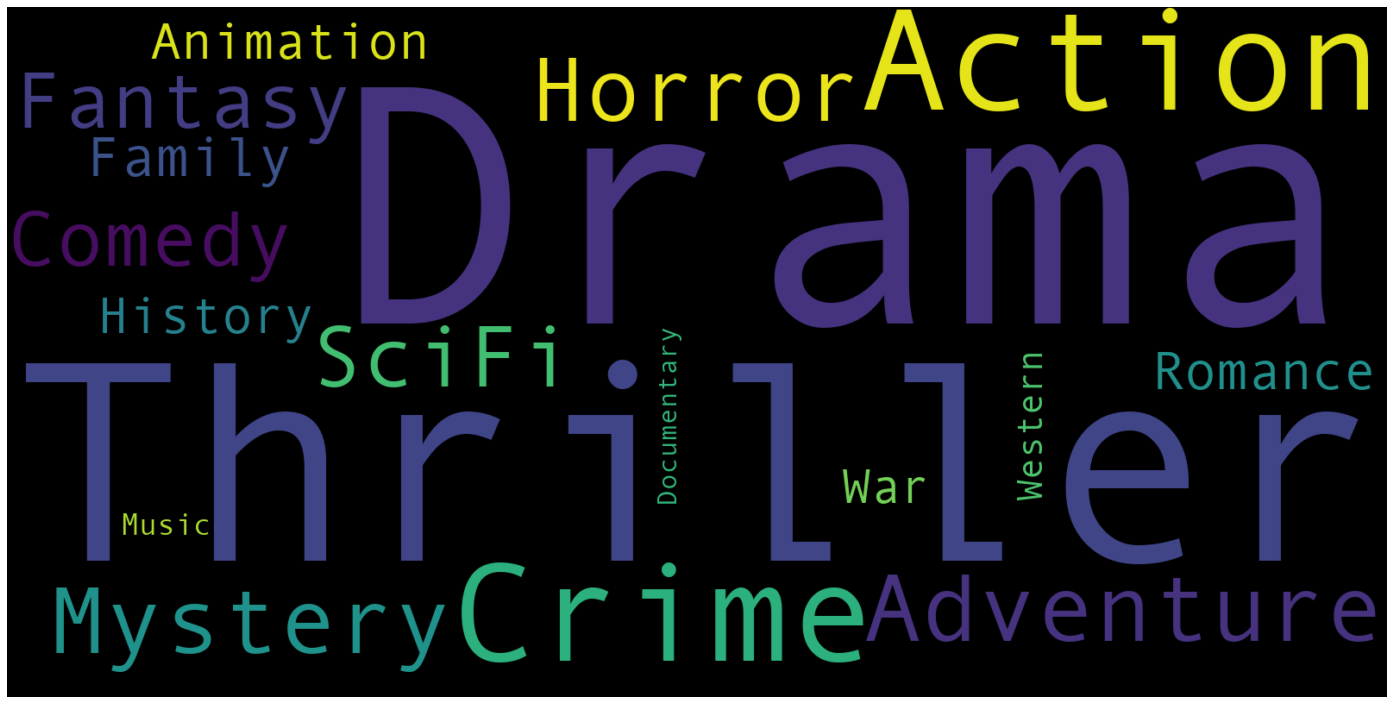

In [23]:
all_genres = " ".join(s for s in genres_explode)


wordcloud = WordCloud(background_color="black",
                      font_path='Andale Mono',
                      width=1600, height=800,
                      collocations=False,
                      colormap = "viridis").generate(all_genres)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")

plt.savefig("Graphs/WordCloud")

In [24]:
wordcloud.words_

{'Drama': 1.0,
 'Thriller': 0.7943262411347518,
 'Action': 0.48936170212765956,
 'Crime': 0.46099290780141844,
 'Adventure': 0.41843971631205673,
 'Mystery': 0.41134751773049644,
 'Horror': 0.375886524822695,
 'SciFi': 0.3404255319148936,
 'Fantasy': 0.28368794326241137,
 'Comedy': 0.2765957446808511,
 'Family': 0.12056737588652482,
 'Romance': 0.10638297872340426,
 'Animation': 0.09929078014184398,
 'History': 0.09929078014184398,
 'War': 0.0851063829787234,
 'Western': 0.0425531914893617,
 'Music': 0.028368794326241134,
 'Documentary': 0.02127659574468085}

Provavelmente não vou usar esse gráfico

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

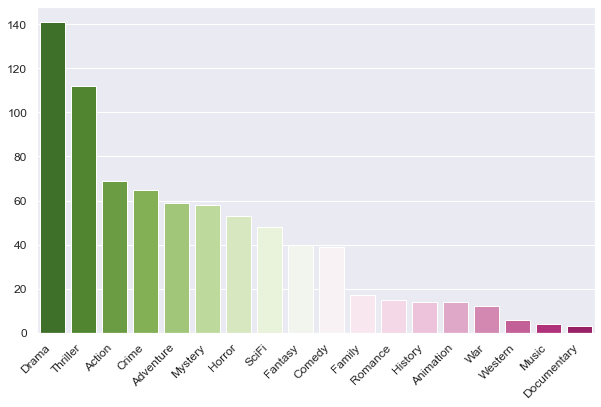

In [25]:
palette = sns.color_palette("PiYG_r", 18)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})
sns.set(rc={'figure.figsize':(10,6)})


barplot = sns.barplot(genres_count.index,
                      genres_count.values,
                      palette = palette
                      )

plt.xticks(rotation=45, fontsize=12, ha = "right")
plt.yticks(fontsize=12)

# Top 10 voted movies

In [26]:
vote_count = base.sort_values("Vote Count", ascending= False)
top_voted = vote_count.head(n =10)

top_voted

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Profit
19,293660,Deadpool,2016,5,2016-02-11,True,3.80,23212,108,Action|Adventure|Comedy,58000000.0,7.831000e+08,7.251000e+08
198,299536,Avengers: Infinity War,2018,4,2018-04-22,True,4.15,18957,149,Adventure|Action|SciFi,300000000.0,2.046240e+09,1.746240e+09
110,671,Harry Potter and the Sorcerer's Stone,2001,4,2016-11-13,False,3.95,17498,152,Adventure|Fantasy|Family,125000000.0,9.764756e+08,8.514756e+08
148,120,The Lord of the Rings: The Fellowship of the Ring,2001,4,2017-06-18,False,4.15,17415,178,Adventure|Fantasy|Action,93000000.0,8.713684e+08,7.783684e+08
45,271110,Captain America 3: Civil War,2016,4,2016-04-28,True,3.70,16475,147,Adventure|Action|SciFi,250000000.0,1.153296e+09,9.032963e+08
85,297761,Suicide Squad,2016,3,2016-08-05,True,2.95,15790,123,Action|Adventure|Crime|Fantasy|SciFi,175000000.0,7.468469e+08,5.718469e+08
188,284054,Black Panther,2018,3,2018-03-13,True,3.70,15464,134,Action|Adventure|Fantasy|SciFi,200000000.0,1.346739e+09,1.146739e+09
106,284052,Doctor Strange,2016,4,2016-11-03,True,3.70,15395,115,Action|Adventure|Fantasy|SciFi,165000000.0,6.777000e+08,5.127000e+08
141,283995,Guardians of the Galaxy Vol. 2,2017,4,2017-05-01,True,3.80,15131,137,Action|Adventure|Comedy|SciFi,200000000.0,8.637561e+08,6.637561e+08
144,297762,Wonder Woman,2017,4,2017-06-01,True,3.65,14919,141,Action|Adventure|Fantasy,149000000.0,8.218470e+08,6.728470e+08


In [27]:
palette = sns.color_palette("Purples_r", 10)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})
sns.set(rc={'figure.figsize':(10,6)})


barplot = sns.barplot(x= top_voted["Vote Count"],
                      y = top_voted["Movie"], 
                      palette = palette,
                      orient = "h").set(ylabel = None)

plt.xticks(rotation=45, fontsize=12, ha = "center")
plt.yticks(fontsize=12)

plt.savefig(plt.savefig("Graphs/Top Voted Movies"), bbox_inches='tight')

ValueError: fname must be a PathLike or file handle

# Top 10 rated movies

In [28]:
vote = base.sort_values("Vote Average", ascending= False)
top_rated = vote.head(n =10)

top_rated

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Profit
168,238,The Godfather,1972,5,2017-09-17,False,4.35,12618,175,Drama|Crime,6000000.0,2.450664e+08,2.390664e+08
160,372058,Your Name,2016,4,2017-08-12,False,4.30,6031,106,Romance|Animation|Drama,30000000.0,3.579861e+08,3.279861e+08
134,377462,O.J.: Made in America,2016,5,2017-03-18,False,4.30,137,467,Documentary,30000000.0,1.518660e+08,1.218660e+08
8,129,Spirited Away,2001,3,2016-01-05,False,4.25,9807,125,Animation|Family|Fantasy,19000000.0,2.749251e+08,2.559251e+08
253,496243,Parasite,2019,4,2020-01-01,False,4.25,8417,133,Comedy|Thriller|Drama,11363000.0,2.459241e+08,2.345611e+08
159,12477,Grave of the Fireflies,1988,5,2017-08-11,False,4.20,2869,89,Animation|Drama|War,3700000.0,1.518660e+08,1.481660e+08
275,324857,Spider-Man: Into the Spider-Verse,2018,5,2020-05-09,False,4.20,7611,117,Action|Adventure|Animation|SciFi|Comedy,90000000.0,3.755408e+08,2.855408e+08
74,207,Dead Poets Society,1989,4,2016-07-03,False,4.15,7245,128,Drama,16400000.0,2.358601e+08,2.194601e+08
198,299536,Avengers: Infinity War,2018,4,2018-04-22,True,4.15,18957,149,Adventure|Action|SciFi,300000000.0,2.046240e+09,1.746240e+09
271,105,Back To The Future,1985,4,2020-04-19,False,4.15,13483,116,Adventure|Comedy|SciFi|Family,19000000.0,3.811098e+08,3.621098e+08


# Linear regression between Budget and Profit

* Trying to discover if it is possible to predict the Profit by the Revenue - any relationship

In [29]:
base.corr()

,ID,Year,Rating,Cinema,Vote Average,Vote Count,Runtime,Budget,Revenue,Profit
ID,1.000000,0.669503,-0.097527,0.292603,-0.193536,0.075768,0.033572,0.062481,0.103843,0.108293
Year,0.669503,1.000000,-0.173690,0.271766,-0.348710,0.216862,0.106775,0.293246,0.252397,0.234255
Rating,-0.097527,-0.173690,1.000000,0.063873,0.508974,0.246885,0.144227,-0.017722,0.109024,0.130760
Cinema,0.292603,0.271766,0.063873,1.000000,-0.118530,0.417465,0.071396,0.485376,0.461081,0.438248
Vote Average,-0.193536,-0.348710,0.508974,-0.118530,1.000000,0.259613,0.266227,-0.025588,0.118045,0.142890
Vote Count,0.075768,0.216862,0.246885,0.417465,0.259613,1.000000,0.142153,0.620908,0.736156,0.731248
Runtime,0.033572,0.106775,0.144227,0.071396,0.266227,0.142153,1.000000,0.267214,0.218748,0.200350
Budget,0.062481,0.293246,-0.017722,0.485376,-0.025588,0.620908,0.267214,1.000000,0.840966,0.775824
Revenue,0.103843,0.252397,0.109024,0.461081,0.118045,0.736156,0.218748,0.840966,1.000000,0.993841
Profit,0.108293,0.234255,0.130760,0.438248,0.142890,0.731248,0.200350,0.775824,0.993841,1.000000


In [30]:
max_thresold = base["Budget"].quantile(0.95)
min_thresold = base["Budget"].quantile(0.05)

In [31]:
plt.xscale('log')
plt.yscale('log')
plt.xlim(100000,10000000000)
plt.xticks([1e6, 1e7, 1e8, 1e9, 1e10])
plt.ylim(100000,10000000000)
plt.yticks([1e5,1e6, 1e7, 1e8, 1e9, 1e10])
# ax = sns.scatterplot(x=base['Revenue'], y=base['Profit'])  

# It's necesary to split the data into train and test to a suprevised learning. First the model is train using a speciffic part of data and after the model will be testing in the remain data

#If the size of samples was not specify, the default size is 25% of the data however the best size is 80:20


X_train, X_test, y_train, y_test = train_test_split(base.Budget, base.Revenue, train_size = 0.8, test_size = 0.2)

sorted_index = np.argsort(X_test)
X_test = X_test[sorted_index]
y_test = y_test[sorted_index]

# Ploting the train and test data

plt.scatter(X_train,y_train, label = "Training Data", color = "r", alpha= .7)
plt.scatter(X_test,y_test, label = "Testing Data", color = "g", alpha= .7)
plt.legend()

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

#The LinearRegression() model perform all the math involves to build the linear regression line
regressor = LinearRegression()
#We fit the data to the Linear Regression Model
regressor.fit(X_train, y_train)


#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
#The result of slop equal to 0.85 means that every single change in the profit, the Budget changes 85%


#Perform some predictor to test the accuracy of the model. For this, we use the test data
y_pred = regressor.predict(X_test)


plt.plot(X_test,y_pred,label = "Linear Regression", color = "b")
plt.scatter(X_test,y_test, label = "Actual Test Data", color = "y", alpha=.7)
plt.legend()


KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [32]:
# Rsquare ellucidate how the model explain the values (0 to 1)
#y_test = data given to the model (true)
#y_pred = values given by the model (not certally true- depends how good is the model)

r2_score(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [33]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

NameError: name 'y_pred' is not defined

In [34]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

NameError: name 'df' is not defined

# Scatterplot Revenue x Profit

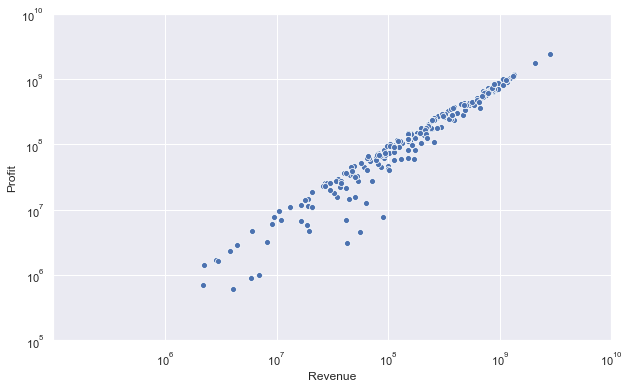

In [35]:
plt.xscale('log')
plt.yscale('log')
plt.xlim(100000,10000000000)
plt.xticks([1e6, 1e7, 1e8, 1e9, 1e10])
plt.ylim(100000,10000000000)
plt.yticks([1e5,1e6, 1e7, 1e8, 1e9, 1e10])



ax = sns.scatterplot(x=base['Revenue'], y=base['Profit'])

This is a little mess because of 2 movies with higher revenue and profit. Let's find out which movies are they

In [36]:
base.sort_values("Profit", ascending= False).head(10)

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Profit
241,299534,Avengers: Endgame,2019,4,2019-04-21,False,4.15,14197,181,Adventure|SciFi|Action,356000000.0,2.797801e+09,2.441801e+09
198,299536,Avengers: Infinity War,2018,4,2018-04-22,True,4.15,18957,149,Adventure|Action|SciFi,300000000.0,2.046240e+09,1.746240e+09
119,12445,Harry Potter and the Deathly Hallows Part II,2011,5,2016-12-18,False,4.05,14037,130,Fantasy|Adventure,125000000.0,1.341511e+09,1.216511e+09
188,284054,Black Panther,2018,3,2018-03-13,True,3.70,15464,134,Action|Adventure|Fantasy|SciFi,200000000.0,1.346739e+09,1.146739e+09
228,351286,Jurassic World: Fallen Kingdom,2018,3,2018-10-28,False,3.25,7830,129,Action|Adventure|SciFi,170000000.0,1.303460e+09,1.133460e+09
179,181808,Star Wars: Episode VIII The Last Jedi,2017,4,2017-12-26,True,3.50,10776,152,SciFi|Action|Adventure,200000000.0,1.332540e+09,1.132540e+09
208,260513,Incredibles 2,2018,5,2018-06-28,True,3.75,8752,118,Action|Adventure|Animation|Family,200000000.0,1.242805e+09,1.042805e+09
247,475557,Joker,2019,5,2019-10-01,True,4.10,13807,122,Crime|Thriller|Drama,55000000.0,1.074251e+09,1.019251e+09
233,297802,Aquaman,2018,4,2018-12-09,True,3.45,8956,144,Action|Adventure|Fantasy,160000000.0,1.148462e+09,9.884618e+08
237,299537,Captain Marvel,2019,3,2019-03-16,True,3.50,9726,124,Action|Adventure|SciFi,152000000.0,1.128275e+09,9.762748e+08


In [37]:
base.describe()

,ID,Year,Rating,Vote Average,Vote Count,Runtime,Budget,Revenue,Profit
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,2.770000e+02,2.770000e+02,2.770000e+02
mean,208317.862816,2008.137184,3.732852,3.638448,5539.296029,121.938628,5.748384e+07,2.917266e+08,2.342428e+08
std,180983.979584,14.994055,0.808091,0.322373,4509.258237,29.889286,6.571422e+07,3.741475e+08,3.208603e+08
min,24.000000,1940.000000,1.000000,2.100000,137.000000,81.000000,3.250000e+05,5.638500e+04,-1.510000e+08
25%,9426.000000,2004.000000,3.000000,3.450000,1972.000000,105.000000,1.300000e+07,4.666586e+07,2.728171e+07
50%,263115.000000,2015.000000,4.000000,3.650000,4039.000000,118.000000,3.000000e+07,1.518660e+08,1.218660e+08
75%,346685.000000,2017.000000,4.000000,3.850000,8331.000000,133.000000,8.200000e+07,3.635333e+08,2.915159e+08
max,619264.000000,2020.000000,5.000000,4.350000,23212.000000,467.000000,3.560000e+08,2.797801e+09,2.441801e+09


In [38]:
base.sort_values("Budget",ascending = False).head(10)
base.sort_values("Revenue",ascending = False).head(10)

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Profit
241,299534,Avengers: Endgame,2019,4,2019-04-21,False,4.15,14197,181,Adventure|SciFi|Action,356000000.0,2.797801e+09,2.441801e+09
198,299536,Avengers: Infinity War,2018,4,2018-04-22,True,4.15,18957,149,Adventure|Action|SciFi,300000000.0,2.046240e+09,1.746240e+09
188,284054,Black Panther,2018,3,2018-03-13,True,3.70,15464,134,Action|Adventure|Fantasy|SciFi,200000000.0,1.346739e+09,1.146739e+09
119,12445,Harry Potter and the Deathly Hallows Part II,2011,5,2016-12-18,False,4.05,14037,130,Fantasy|Adventure,125000000.0,1.341511e+09,1.216511e+09
179,181808,Star Wars: Episode VIII The Last Jedi,2017,4,2017-12-26,True,3.50,10776,152,SciFi|Action|Adventure,200000000.0,1.332540e+09,1.132540e+09
228,351286,Jurassic World: Fallen Kingdom,2018,3,2018-10-28,False,3.25,7830,129,Action|Adventure|SciFi,170000000.0,1.303460e+09,1.133460e+09
208,260513,Incredibles 2,2018,5,2018-06-28,True,3.75,8752,118,Action|Adventure|Animation|Family,200000000.0,1.242805e+09,1.042805e+09
45,271110,Captain America 3: Civil War,2016,4,2016-04-28,True,3.70,16475,147,Adventure|Action|SciFi,250000000.0,1.153296e+09,9.032963e+08
233,297802,Aquaman,2018,4,2018-12-09,True,3.45,8956,144,Action|Adventure|Fantasy,160000000.0,1.148462e+09,9.884618e+08
274,429617,Spider-Man: Far from Home,2019,5,2020-05-02,False,3.75,7862,129,Action|Adventure|SciFi,160000000.0,1.131928e+09,9.719280e+08


* Ver se esse gráfico abaixo vai ser interessante e se sim, inverter a ordem dos filmes

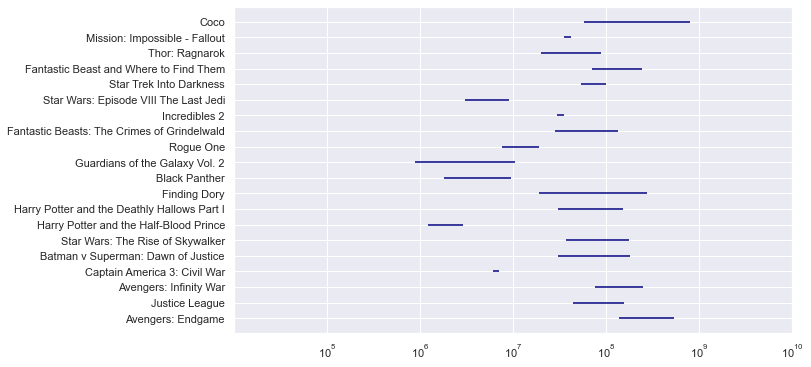

In [39]:
plt.xscale('log')
plt.xlim(10000,10000000000)
plt.xticks([1e5,1e6, 1e7, 1e8, 1e9, 1e10])
sns.set_style("white")

budget = base.sort_values("Budget", ascending = False).iloc[0:20]


lollipop = plt.hlines(budget["Movie"], 
          xmin=base["Budget"], 
          xmax=base['Revenue'],
          color = "navy",
          )

In [40]:
base.sort_values("Budget", ascending= False).head(20)

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Profit
241,299534,Avengers: Endgame,2019,4,2019-04-21,False,4.15,14197,181,Adventure|SciFi|Action,356000000.0,2.797801e+09,2.441801e+09
175,141052,Justice League,2017,3,2017-11-16,True,3.10,9302,120,Action|Adventure|Fantasy|SciFi,300000000.0,6.579243e+08,3.579243e+08
198,299536,Avengers: Infinity War,2018,4,2018-04-22,True,4.15,18957,149,Adventure|Action|SciFi,300000000.0,2.046240e+09,1.746240e+09
45,271110,Captain America 3: Civil War,2016,4,2016-04-28,True,3.70,16475,147,Adventure|Action|SciFi,250000000.0,1.153296e+09,9.032963e+08
35,209112,Batman v Superman: Dawn of Justice,2016,3,2016-03-24,True,2.90,13621,151,Action|Adventure|Fantasy,250000000.0,8.736349e+08,6.236349e+08
252,181812,Star Wars: The Rise of Skywalker,2019,3,2019-12-26,True,3.30,5253,142,Action|Adventure|SciFi,250000000.0,1.074144e+09,8.241442e+08
116,767,Harry Potter and the Half-Blood Prince,2009,4,2016-11-27,False,3.85,12923,153,Adventure|Fantasy,250000000.0,9.339592e+08,6.839592e+08
117,12444,Harry Potter and the Deathly Hallows Part I,2010,4,2016-12-11,True,3.90,13064,146,Adventure|Fantasy,250000000.0,9.543059e+08,7.043059e+08
76,127380,Finding Dory,2016,4,2016-07-03,True,3.50,9109,97,Adventure|Animation|Comedy|Family,200000000.0,1.028571e+09,8.285709e+08
188,284054,Black Panther,2018,3,2018-03-13,True,3.70,15464,134,Action|Adventure|Fantasy|SciFi,200000000.0,1.346739e+09,1.146739e+09


# Relation between Year and Revenue

* Melhorar o hue (eixo)

(1940.0, 2020.0)

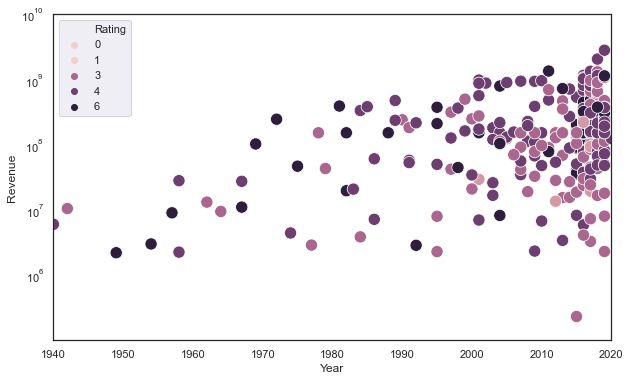

In [41]:
plt.yscale("log")
sns.set_context("notebook", font_scale=1.2)
sns.set(rc = {"figure.figsize":(12,8)})


# sns.scatterplot(data = base, 
#                 x = "Year", 
#                 y = "Budget",
#                 alpha=.6,
#                 color = "darkviolet",
#                 s = 150,
#                 marker = "X")

sns.scatterplot(data = base, 
                x = "Year", 
                y = "Revenue",
                alpha=1,
                color = "navy",
                s = 150,
                hue = "Rating"
                )


plt.ylim(100000,10000000000)
plt.yticks([1e6, 1e7, 1e8, 1e9, 1e10])
plt.xlim(1940,2020, 10)


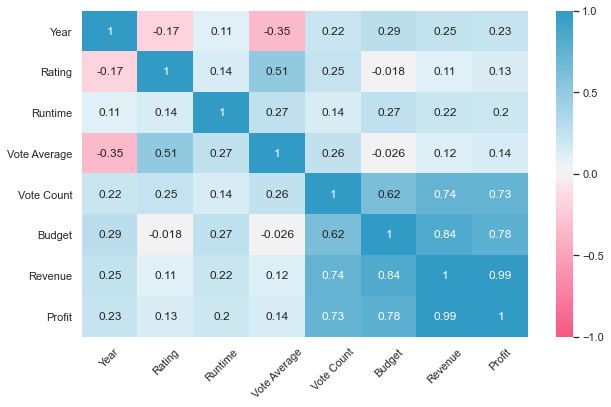

In [42]:
#mask = np.triu(base.corr())
values = base[["Year", "Rating","Runtime", "Vote Average", "Vote Count", "Budget", "Revenue", "Profit"]]
sns.set(rc={'figure.figsize':(10,6)})

#creating the colormap
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)


sns.heatmap(values.corr(), 
            annot = True, 
            vmin=-1, vmax=1, center= 0, 
            cmap= cmap,
            cbar_kws = {"ticks":[-1, -.5,0,.5,1]}
            )
            
plt.xticks(rotation = 45, ha = "center")


plt.savefig("Graphs/Correlation Heatmap")